In [1]:
import pandas as pd
import plotly.express as px

In [2]:
# Read Broad's repurposing hub dataset
repurp = (
    pd.read_csv('input/repurposing_drugs_20180907.txt',
                delimiter='\t',
                comment='!',
                encoding='iso-8859-1',
                usecols=['pert_iname', 'clinical_phase'])
)

# Read JUMP-Target1 metadata file
metadata = pd.read_csv('../metadata/moa/JUMP-Target-1_compound_metadata.tsv',
                       delimiter='\t',
                       usecols=['pert_iname', 'broad_sample'])

In [3]:
# Merge the two dataframes
clinical_phase_df = (
    metadata.merge(repurp, on='pert_iname', how='inner')
    .clinical_phase.value_counts()
    .reset_index()
)

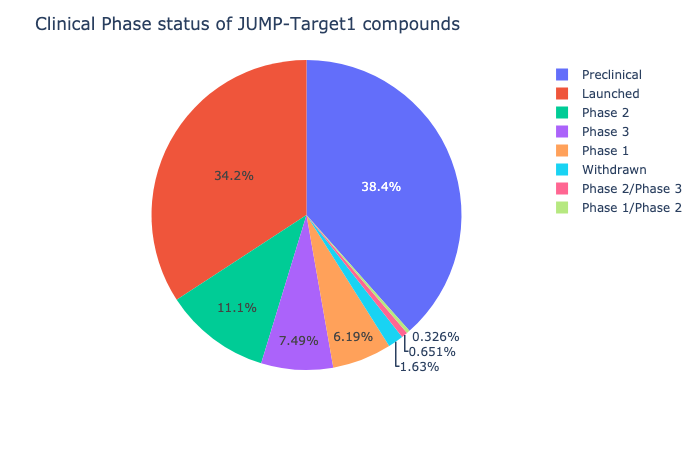

In [4]:
# Plot pie chart
fig = px.pie(data_frame=clinical_phase_df,
             values='clinical_phase',
             names='index')
fig.update_layout(title='Clinical Phase status of JUMP-Target1 compounds')
fig.show("png")
fig.write_image('figures/clinical_phase.png', width=640, height=480, scale=2)